In [20]:
import Boost
import Kernel
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold

## Import Data

In [7]:
heart_df = pd.read_csv('Data/processed.cleveland.heart.data',header=None)
heart_df.iloc[:,-2] = heart_df.iloc[:,-2].replace('?',None).astype('float')
heart_df.iloc[:,-3] = heart_df.iloc[:,-3].replace('?',None).astype('float')
heart_df.iloc[:,-2] = heart_df.iloc[:,-2].fillna(heart_df.iloc[:,-2].median())
heart_df.iloc[:,-3] = heart_df.iloc[:,-3].fillna(heart_df.iloc[:,-3].median())
heart_X = np.array(heart_df.iloc[:,:-1])
heart_y = np.where(heart_df.iloc[:,-1]>0,1,-1)
heart_y.shape = (heart_y.shape[0],1)
lambda_val_list = [0.001,0.01,0.1,1,10]

## Kernel Boost

In [9]:
processing_summary = []
for lambda_val in lambda_val_list:
    for nu_val in np.linspace(1,10,19):
        accuracy_summay = []
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        for train_idx, test_idx in kfold.split(heart_X):
            train_X, test_X = heart_X[train_idx], heart_X[test_idx]
            train_y, test_y = heart_y[train_idx], heart_y[test_idx]
            ss_transform = StandardScaler()
            ss_transform.fit(train_X)
            train_X_ss = ss_transform.transform(train_X)
            test_X_ss = ss_transform.transform(test_X)
            heart_kb = Boost.KernelBoost(Kernel.Gaussian_Kernel, 'hinge', lambda_val, nu_val)
            heart_kb.fit(train_X_ss, train_y)
            accuracy_summay.append(accuracy_score(test_y, np.sign(heart_kb.predict(test_X_ss)).flatten()))
        mean_accuracy = np.mean(accuracy_summay)
        print('lambda=',lambda_val,'nu=',nu_val,'accuracy=',np.mean(mean_accuracy))
        processing_summary.append(
        {'lambda_val':lambda_val, 'nu_val':nu_val,'accuracy':mean_accuracy}
        )

lambda= 0.001 nu= 1.0 accuracy= 0.8182513661202184
lambda= 0.001 nu= 1.5 accuracy= 0.8182513661202184
lambda= 0.001 nu= 2.0 accuracy= 0.8182513661202184
lambda= 0.001 nu= 2.5 accuracy= 0.8182513661202184
lambda= 0.001 nu= 3.0 accuracy= 0.8182513661202184
lambda= 0.001 nu= 3.5 accuracy= 0.8182513661202184
lambda= 0.001 nu= 4.0 accuracy= 0.8182513661202184
lambda= 0.001 nu= 4.5 accuracy= 0.8182513661202184
lambda= 0.001 nu= 5.0 accuracy= 0.8182513661202184
lambda= 0.001 nu= 5.5 accuracy= 0.8182513661202184
lambda= 0.001 nu= 6.0 accuracy= 0.8182513661202184
lambda= 0.001 nu= 6.5 accuracy= 0.8182513661202184
lambda= 0.001 nu= 7.0 accuracy= 0.8182513661202184
lambda= 0.001 nu= 7.5 accuracy= 0.8182513661202184
lambda= 0.001 nu= 8.0 accuracy= 0.8182513661202184
lambda= 0.001 nu= 8.5 accuracy= 0.8182513661202184
lambda= 0.001 nu= 9.0 accuracy= 0.8182513661202184
lambda= 0.001 nu= 9.5 accuracy= 0.8182513661202184
lambda= 0.001 nu= 10.0 accuracy= 0.8182513661202184
lambda= 0.01 nu= 1.0 accuracy=

/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


lambda= 1 nu= 9.5 accuracy= 0.8083606557377049


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


lambda= 1 nu= 10.0 accuracy= 0.811639344262295
lambda= 10 nu= 1.0 accuracy= 0.7951366120218578
lambda= 10 nu= 1.5 accuracy= 0.7951366120218578
lambda= 10 nu= 2.0 accuracy= 0.7984153005464482
lambda= 10 nu= 2.5 accuracy= 0.7951366120218578
lambda= 10 nu= 3.0 accuracy= 0.7951366120218578
lambda= 10 nu= 3.5 accuracy= 0.8016939890710383
lambda= 10 nu= 4.0 accuracy= 0.8083060109289617
lambda= 10 nu= 4.5 accuracy= 0.811639344262295
lambda= 10 nu= 5.0 accuracy= 0.8083606557377049
lambda= 10 nu= 5.5 accuracy= 0.8149180327868851


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


lambda= 10 nu= 6.0 accuracy= 0.8149180327868851


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


lambda= 10 nu= 6.5 accuracy= 0.8214754098360656


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


lambda= 10 nu= 7.0 accuracy= 0.8181967213114755


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


lambda= 10 nu= 7.5 accuracy= 0.8181967213114755


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 8.0 accuracy= 0.828087431693989


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 8.5 accuracy= 0.8214754098360656


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 9.0 accuracy= 0.8313114754098361


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. T

lambda= 10 nu= 9.5 accuracy= 0.8280327868852458


/Users/rossmcdonald/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [10]:
kernel_res_df = pd.DataFrame(processing_summary)
kernel_res_df.to_csv('heart_kernel_boost.csv')

## Iterative Boost

In [14]:
iterative_processing_summary = []
for lambda_val in [0.1]: #lambda_val_list:
    for nu_val in range(1,20):
        accuracy_summay = []
        kfold = KFold(n_splits=5, random_state=42, shuffle=True)
        for train_idx, test_idx in kfold.split(heart_X):
            train_X, test_X = heart_X[train_idx], heart_X[test_idx]
            train_y, test_y = heart_y[train_idx], heart_y[test_idx]
            ss_transform = StandardScaler()
            ss_transform.fit(train_X)
            train_X_ss = ss_transform.transform(train_X)
            test_X_ss = ss_transform.transform(test_X)
            heart_kb = Boost.IterativeKernelBoost(Kernel.Gaussian_Kernel, 'hinge', lambda_val, nu_val)
            heart_kb.fit(train_X_ss, train_y)
            accuracy_summay.append(accuracy_score(test_y, np.sign(heart_kb.predict(test_X_ss)).flatten()))
        mean_accuracy = np.mean(accuracy_summay)
        print('lambda=',lambda_val,'nu=',nu_val,'accuracy=',np.mean(mean_accuracy))
        iterative_processing_summary.append(
        {'lambda_val':lambda_val, 'nu_val':nu_val,'accuracy':mean_accuracy}
        )

lambda= 0.1 nu= 1 accuracy= 0.8182513661202184
lambda= 0.1 nu= 2 accuracy= 0.8182513661202184
lambda= 0.1 nu= 3 accuracy= 0.8149726775956283
lambda= 0.1 nu= 4 accuracy= 0.8149726775956283
lambda= 0.1 nu= 5 accuracy= 0.8149726775956283
lambda= 0.1 nu= 6 accuracy= 0.8182513661202184
lambda= 0.1 nu= 7 accuracy= 0.8182513661202184
lambda= 0.1 nu= 8 accuracy= 0.8149180327868851
lambda= 0.1 nu= 9 accuracy= 0.8149180327868851
lambda= 0.1 nu= 10 accuracy= 0.8149180327868851
lambda= 0.1 nu= 11 accuracy= 0.8149180327868851
lambda= 0.1 nu= 12 accuracy= 0.8149180327868851
lambda= 0.1 nu= 13 accuracy= 0.811639344262295
lambda= 0.1 nu= 14 accuracy= 0.811639344262295
lambda= 0.1 nu= 15 accuracy= 0.811639344262295
lambda= 0.1 nu= 16 accuracy= 0.811639344262295
lambda= 0.1 nu= 17 accuracy= 0.811639344262295
lambda= 0.1 nu= 18 accuracy= 0.811639344262295
lambda= 0.1 nu= 19 accuracy= 0.811639344262295


In [12]:
iterative_kernel_res_df = pd.DataFrame(iterative_processing_summary)
iterative_kernel_res_df.to_csv('heart_iterative_boost.csv')

# Compare Results

In [16]:
iterative_kernel_res_df = pd.read_csv('heart_iterative_boost.csv', index_col=0)
iterative_kernel_res_df.loc[:,'Algo_Type'] = 'Iterative Boosting'
boosting_kernel_res_df = pd.read_csv('heart_kernel_boost.csv', index_col=0)
boosting_kernel_res_df.loc[:,'Algo_Type'] = 'Kernel Boosting'
combined_df = pd.concat([iterative_kernel_res_df,boosting_kernel_res_df])

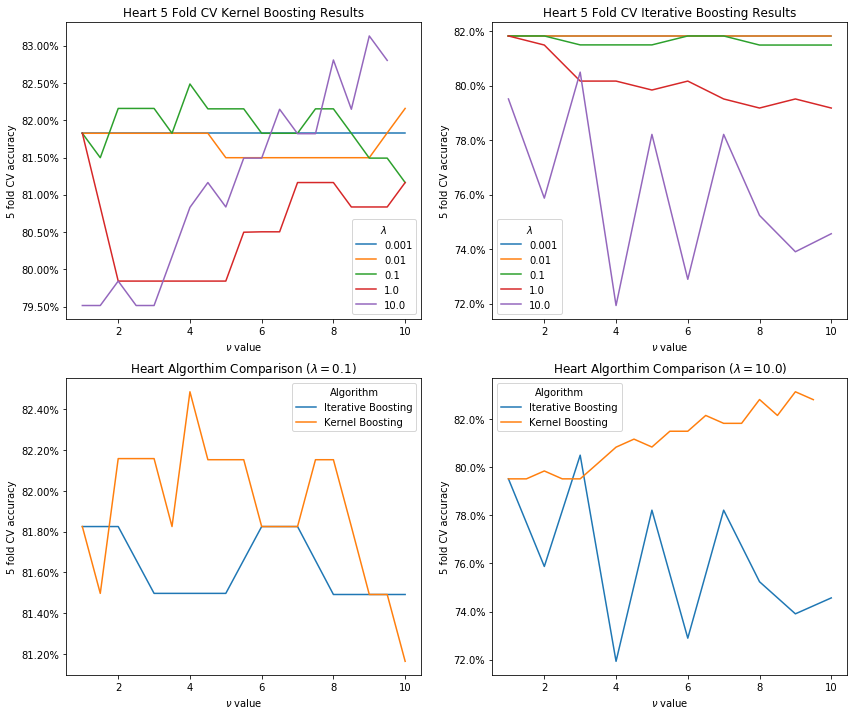

In [101]:
#fig = plt.figure(figsize=[12,8])
fig, axs = plt.subplots(2, 2, figsize=[14,12])

#
axs[0,0].yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in boosting_kernel_res_df.groupby('lambda_val'):
    axs[0,0].plot(df['nu_val'],df['accuracy']*100,label=lambda_val)

axs[0,0].legend(title=r'$\lambda$')
axs[0,0].set_title('Heart 5 Fold CV Kernel Boosting Results')
axs[0,0].set_xlabel(r'$\nu$ value')
axs[0,0].set_ylabel('5 fold CV accuracy')

#
axs[0,1].yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in iterative_kernel_res_df.groupby('lambda_val'):
    axs[0,1].plot(df['nu_val'],df['accuracy']*100,label=lambda_val)

axs[0,1].legend(title=r'$\lambda$')
axs[0,1].set_title('Heart 5 Fold CV Iterative Boosting Results')
axs[0,1].set_xlabel(r'$\nu$ value')
axs[0,1].set_ylabel('5 fold CV accuracy')

#
combined_ex_one_df = combined_df[combined_df.lambda_val==0.1]
axs[1,0].yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in combined_ex_one_df.groupby('Algo_Type'):
    axs[1,0].plot(df['nu_val'],df['accuracy']*100,label=lambda_val)

axs[1,0].legend(title=r'Algorithm')
axs[1,0].set_title(r'Heart Algorthim Comparison ($\lambda=0.1$)')
axs[1,0].set_xlabel(r'$\nu$ value')
axs[1,0].set_ylabel('5 fold CV accuracy')

#
combined_ex_two_df = combined_df[combined_df.lambda_val==10]
axs[1,1].yaxis.set_major_formatter(mtick.PercentFormatter())

for lambda_val, df in combined_ex_two_df.groupby('Algo_Type'):
    axs[1,1].plot(df['nu_val'],df['accuracy']*100,label=lambda_val)

axs[1,1].legend(title=r'Algorithm')
axs[1,1].set_title(r'Heart Algorthim Comparison ($\lambda=10.0$)')
axs[1,1].set_xlabel(r'$\nu$ value')
axs[1,1].set_ylabel('5 fold CV accuracy')

fig.savefig('images/heart-all.png', bbox_inches='tight')

# Comparison by McNemar's Test

In [43]:
lambda_val=0.1
nu_val=4
kernel_pred_summary = []
test_idx_list = []
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
for train_idx, test_idx in kfold.split(heart_X):
    train_X, test_X = heart_X[train_idx], heart_X[test_idx]
    train_y, test_y = heart_y[train_idx], heart_y[test_idx]
    ss_transform = StandardScaler()
    ss_transform.fit(train_X)
    train_X_ss = ss_transform.transform(train_X)
    test_X_ss = ss_transform.transform(test_X)
    heart_kb = Boost.KernelBoost(Kernel.Gaussian_Kernel, 'hinge', lambda_val, nu_val)
    heart_kb.fit(train_X_ss, train_y)
    kernel_pred_summary.append(np.sign(heart_kb.predict(test_X_ss)) )
    test_idx_list.append(test_idx)

In [44]:
kernel_pred_summary = np.concatenate(kernel_pred_summary)
test_idx = np.concatenate(test_idx_list)

In [55]:
accuracy_score(heart_y[test_idx], kernel_pred_summary)

0.8250825082508251

In [53]:
lambda_val=0.1
nu_val=4
iterative_pred_summary = []
test_idx_list = []
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
for train_idx, test_idx in kfold.split(heart_X):
    train_X, test_X = heart_X[train_idx], heart_X[test_idx]
    train_y, test_y = heart_y[train_idx], heart_y[test_idx]
    ss_transform = StandardScaler()
    ss_transform.fit(train_X)
    train_X_ss = ss_transform.transform(train_X)
    test_X_ss = ss_transform.transform(test_X)
    heart_kb = Boost.IterativeKernelBoost(Kernel.Gaussian_Kernel, 'hinge', lambda_val, nu_val)
    heart_kb.fit(train_X_ss, train_y)
    iterative_pred_summary.append(np.sign(heart_kb.predict(test_X_ss)) )
    test_idx_list.append(test_idx)

In [54]:
iterative_pred_summary = np.concatenate(iterative_pred_summary)
test_idx = np.concatenate(test_idx_list)
accuracy_score(heart_y[test_idx], iterative_pred_summary)

0.8151815181518152

In [56]:
from statsmodels.stats.contingency_tables import mcnemar

In [58]:
def getMcnemarTest(truth, class1, class2, alpha=0.05):
    """
    """
    m_res = mcnemar(pd.crosstab(class1==truth,
            class2==truth)
                   )
    return {'reject_null':m_res.pvalue<alpha, 'pval':m_res.pvalue,'class1':class1_col,'class2':class2_col}

In [72]:
heart_y[test_idx]==iterative_pred_summary
mc_res = mcnemar(pd.crosstab(pd.Series((heart_y[test_idx]==iterative_pred_summary).flatten()), 
                    pd.Series((heart_y[test_idx]==kernel_pred_summary).flatten() )
                   )
       )

mc_res.pvalue

0.25

In [105]:
combined_df[combined_df.Algo_Type=='Iterative Boosting'].sort_values('accuracy').tail()

,accuracy,lambda_val,nu_val,Algo_Type
20,0.818251,0.100,1.0,Iterative Boosting
26,0.818251,0.100,7.0,Iterative Boosting
25,0.818251,0.100,6.0,Iterative Boosting
13,0.818251,0.010,4.0,Iterative Boosting
0,0.818251,0.001,1.0,Iterative Boosting
